In [1]:
import gymnasium
import gymnasium_env

env = gymnasium.make('gymnasium_env/Bess-v0')

In [2]:
rewards = []

observation, info = env.reset(seed=42)

episode_over = False
while not episode_over:
    action = env.action_space.sample()
    print('Action: ', action)
    observation, reward, terminated, truncated, info = env.step(action)
    rewards.append(reward)
    print('Observation: ',observation)
    print('Reward: ', reward)
    print('Info: ', info)
    episode_over = terminated or truncated

env.close()

Action:  {'RI': np.int64(-1)}
Observation:  {'dispatch': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1]), 'price': array([ 14, 116,  97,  66,  64, 127,  11, 102,  28,  14,  79, 144, 111,
       115, 106, 117,  74,  20, 125,  66,  73,  56,  26, 140])}
Reward:  0
Info:  {'time': 1, 'avg_price': np.float64(79.125), 'spread': np.int64(134)}
Action:  {'RI': np.int64(1)}
Observation:  {'dispatch': array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1]), 'price': array([ 14, 117,  98,  64,  63, 126,  10, 100,  28,  12,  79, 144, 112,
       115, 105, 118,  73,  19, 126,  65,  71,  55,  27, 138])}
Reward:  133
Info:  {'time': 2, 'avg_price': np.float64(78.79166666666667), 'spread': np.int64(133)}
Action:  {'RI': np.int64(0)}
Observation:  {'dispatch': array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1]), 'price': array([ 13, 115,  98,  63,  62, 124,  10, 100,  29,  11,  77, 145, 112,
       

/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be int16, actual type: int64
  logger.warn(
/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be int16, actual type: int64
  logger.warn(
/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is

In [3]:
sum(rewards)

np.int64(4)

In [7]:
from hercule_agent import REINFORCE
import gymnasium
import gymnasium_env

import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

# Create and wrap the environment
env = gymnasium.make('gymnasium_env/Bess-v0')
env = gymnasium.wrappers.FlattenObservation(env)
env = gymnasium.wrappers.RecordEpisodeStatistics(env, buffer_length=50)

total_num_episodes = int(5e4)  # Total number of episodes
# Observation-space of InvertedPendulum-v4 (4)
obs_space_dims = env.observation_space.shape[0]
# Action-space of InvertedPendulum-v4 (1)
action_space_dims = 3 #env.action_space.shape[0]
rewards_over_seeds = []

for seed in [1, 2, 3]:  # Fibonacci seeds
    # set seed
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)

    # Reinitialize agent every seed
    agent = REINFORCE(obs_space_dims, action_space_dims)
    reward_over_episodes = []

    for episode in range(total_num_episodes):
        # gymnasium v26 requires users to set seed while resetting the environment
        obs, info = env.reset(seed=seed)

        done = False
        while not done:
            action = agent.sample_action(obs)

            # Step return type - `tuple[ObsType, SupportsFloat, bool, bool, dict[str, Any]]`
            # These represent the next observation, the reward from the step,
            # if the episode is terminated, if the episode is truncated and
            # additional info from the step
            
            obs, reward, terminated, truncated, info = env.step({'RI': int(np.argmax(action)-1)})
            agent.rewards.append(reward)

            # End the episode when either truncated or terminated is true
            #  - truncated: The episode duration reaches max number of timesteps
            #  - terminated: Any of the state space values is no longer finite.
            done = terminated or truncated

        reward_over_episodes.append(env.return_queue[-1])
        agent.update()

        if episode % 1000 == 0:
            avg_reward = int(np.mean(env.return_queue))
            print("Episode:", episode, "Average Reward:", avg_reward)

    rewards_over_seeds.append(reward_over_episodes)

/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be int16, actual type: int64
  logger.warn(
/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be int16, actual type: int64
  logger.warn(
/Users/eymericgenty/Eclipse_Dev/rl_experiments/.venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is

Episode: 0 Average Reward: -2
Episode: 1000 Average Reward: 102
Episode: 2000 Average Reward: 84
Episode: 3000 Average Reward: 91
Episode: 4000 Average Reward: 88
Episode: 5000 Average Reward: 82
Episode: 6000 Average Reward: 105
Episode: 7000 Average Reward: 98
Episode: 8000 Average Reward: 97
Episode: 9000 Average Reward: 85
Episode: 10000 Average Reward: 102
Episode: 11000 Average Reward: 140
Episode: 12000 Average Reward: 137
Episode: 13000 Average Reward: 129
Episode: 14000 Average Reward: 131
Episode: 15000 Average Reward: 118
Episode: 16000 Average Reward: 144
Episode: 17000 Average Reward: 142
Episode: 18000 Average Reward: 135
Episode: 19000 Average Reward: 120
Episode: 20000 Average Reward: 134
Episode: 21000 Average Reward: 145
Episode: 22000 Average Reward: 115
Episode: 23000 Average Reward: 131
Episode: 24000 Average Reward: 140
Episode: 25000 Average Reward: 116
Episode: 26000 Average Reward: 148
Episode: 27000 Average Reward: 148
Episode: 28000 Average Reward: 147
Episod

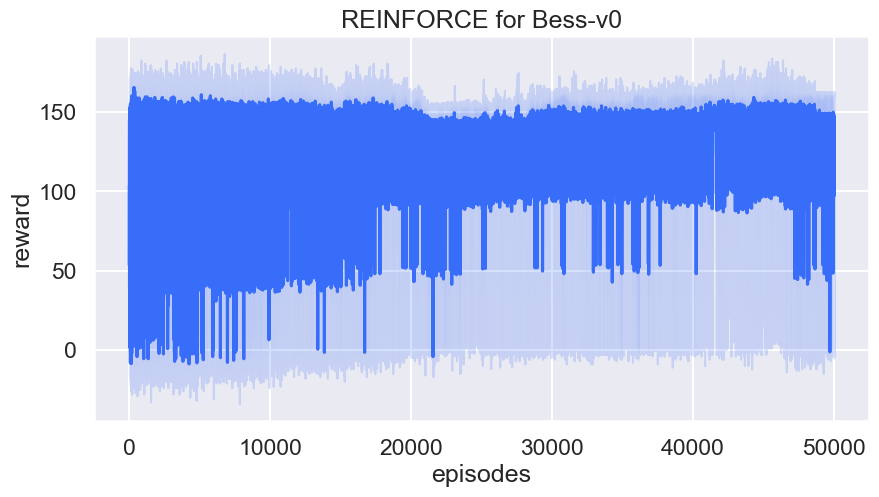

In [8]:
rewards_to_plot = [[reward for reward in rewards] for rewards in rewards_over_seeds]
df1 = pd.DataFrame(rewards_to_plot).melt()
df1.rename(columns={"variable": "episodes", "value": "reward"}, inplace=True)
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", data=df1).set(
    title="REINFORCE for Bess-v0"
)
plt.show()

In [9]:
rewards = []

observation, info = env.reset(seed=42)

episode_over = False
while not episode_over:
    action = agent.sample_action(obs)
    action = {'RI': int(np.argmax(action)-1)}
    print('Action: ', action)
    observation, reward, terminated, truncated, info = env.step(action)
    rewards.append(reward)
    print('Observation: ',observation)
    print('Reward: ', reward)
    print('Info: ', info)
    episode_over = terminated or truncated

env.close()

print(sum(rewards))

Action:  {'RI': 1}
Observation:  [  0   1   0   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0
   1   0   0   0   1   0   0   1   0   0   1   0   0   1   0   0   0   1
   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0
   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0
  14 116  97  66  64 127  11 102  28  14  79 144 111 115 106 117  74  20
 125  66  73  56  26 140]
Reward:  134
Info:  {'time': 1, 'avg_price': np.float64(79.125), 'spread': np.int64(134)}
Action:  {'RI': 1}
Observation:  [  0   1   0   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0
   1   0   0   0   1   0   0   1   0   0   1   0   0   1   0   0   0   1
   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0
   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0   0   1   0
  14 117  98  64  63 126  10 100  28  12  79 144 112 115 105 118  73  19
 126  65  71  55  27 138]
Reward:  0
Info:  {'time': 2, 'avg_price': np.float64(78.79166